In [1]:
import os
import numpy as np
import torch
import matplotlib.pyplot as plt
%matplotlib inline

from common.dataset import TrainDataProvider
from common.function import init_embedding

### Path Setting

In [2]:
fixed_dir = './fixed_sample'
data_dir = './dataset'

## Fixed sample Generate

### Sample for each Fonts

- training에 사용할 폰트는 총 26개
- 26개의 폰트별로 각각 모두 고정된 샘플을 만들어놓는다

In [3]:
sample_size = 32
img_size = 128
fonts_num = 25

for i in range(fonts_num):
    filter_ = [i]
    data_provider = TrainDataProvider(data_dir, filter_by=filter_, verbose=False)
    train_batch_iter = data_provider.get_train_iter(sample_size)
    for labels, batch_images in train_batch_iter:
        fixed_batch = batch_images.cuda()
        fixed_source = fixed_batch[:, 1, :, :].reshape(sample_size, 1, img_size, img_size)
        fixed_target = fixed_batch[:, 0, :, :].reshape(sample_size, 1, img_size, img_size)
        fixed_label = torch.from_numpy(np.array(labels)).cuda()
        torch.save(fixed_source, os.path.join(fixed_dir, 'fixed_source_%s.pkl' % i))
        torch.save(fixed_target, os.path.join(fixed_dir, 'fixed_target_%s.pkl' % i))
        torch.save(fixed_label, os.path.join(fixed_dir, 'fixed_label_%s.pkl' % i))
        break

In [4]:
fixed_source_1 = torch.load(os.path.join(fixed_dir, 'fixed_source_1.pkl'))
fixed_target_1 = torch.load(os.path.join(fixed_dir, 'fixed_target_1.pkl'))
fixed_label_1 = torch.load(os.path.join(fixed_dir, 'fixed_label_1.pkl'))

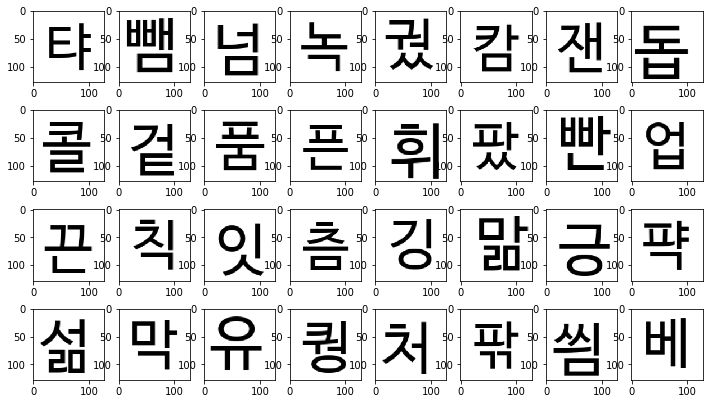

In [5]:
plt.figure(figsize=(12, 7))
for idx, image in enumerate(fixed_source_1):
    plt.subplot(4, 8, idx+1)
    plt.imshow(image.reshape(128, 128).cpu().numpy(), cmap='gray')
plt.show()

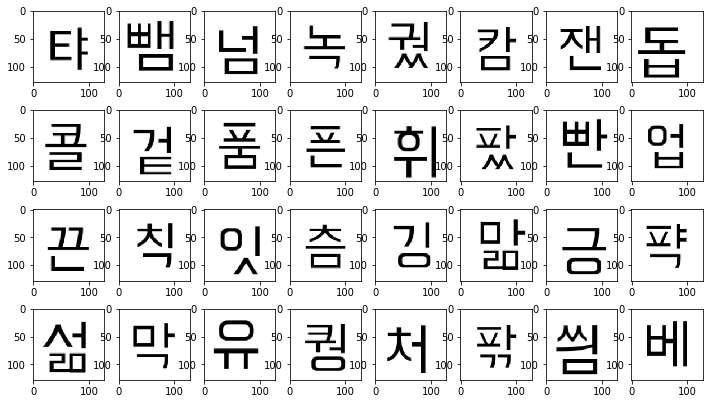

In [6]:
plt.figure(figsize=(12, 7))
for idx, image in enumerate(fixed_target_1):
    plt.subplot(4, 8, idx+1)
    plt.imshow(image.reshape(128, 128).cpu().numpy(), cmap='gray')
plt.show()

### Sample for random fonts

- 여러 폰트가 섞여있는 데이터셋을 만들어놓는다

In [13]:
sample_size = 32
img_size = 128

data_provider = TrainDataProvider(data_dir, verbose=False)
train_batch_iter = data_provider.get_train_iter(sample_size)
for labels, batch_images in train_batch_iter:
    fixed_batch = batch_images.cuda()
    fixed_source = fixed_batch[:, 1, :, :].reshape(sample_size, 1, img_size, img_size)
    fixed_target = fixed_batch[:, 0, :, :].reshape(sample_size, 1, img_size, img_size)
    fixed_labels = torch.from_numpy(np.array(labels)).cuda()
    torch.save(fixed_source, os.path.join(fixed_dir, 'fixed_source_all.pkl'))
    torch.save(fixed_target, os.path.join(fixed_dir, 'fixed_target_all.pkl'))
    torch.save(fixed_labels, os.path.join(fixed_dir, 'fixed_label_all.pkl'))
    break

In [14]:
fixed_source_all = torch.load(os.path.join(fixed_dir, 'fixed_source_all.pkl'))
fixed_target_all = torch.load(os.path.join(fixed_dir, 'fixed_target_all.pkl'))
fixed_label_all = torch.load(os.path.join(fixed_dir, 'fixed_label_all.pkl'))

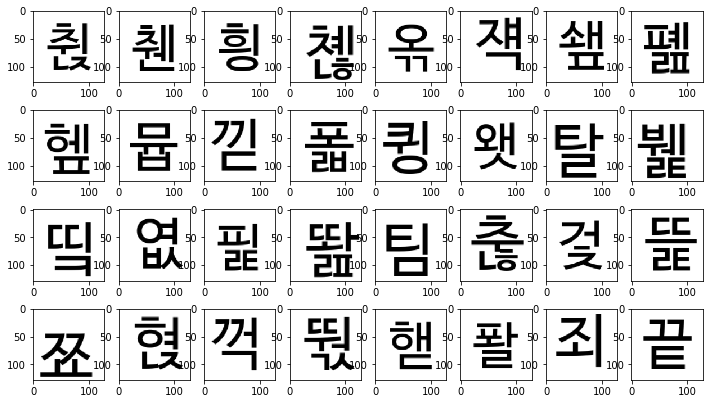

In [16]:
plt.figure(figsize=(12, 7))
for idx, image in enumerate(fixed_source_all):
    plt.subplot(4, 8, idx+1)
    plt.imshow(image.reshape(128, 128).cpu().numpy(), cmap='gray')
plt.show()

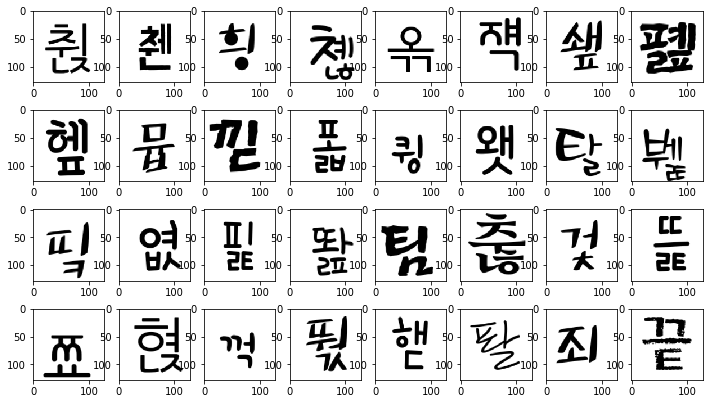

In [17]:
plt.figure(figsize=(12, 7))
for idx, image in enumerate(fixed_target_all):
    plt.subplot(4, 8, idx+1)
    plt.imshow(image.reshape(128, 128).cpu().numpy(), cmap='gray')
plt.show()

### Fixed Embedding

In [18]:
EMBEDDING_DIM = 128
EMBEDDING_NUM = 100
EMBEDDINGS = init_embedding(EMBEDDING_NUM, EMBEDDING_DIM)
EMBEDDINGS = EMBEDDINGS.cuda()
EMBEDDINGS.shape

torch.Size([100, 1, 1, 128])

In [19]:
torch.save(EMBEDDINGS, os.path.join(fixed_dir, 'EMBEDDINGS.pkl'))